# Canonical Correlation Analysis on iris datset

Modified by K.C. Alexander O

for final project of HKUST Math5473

24 April 2025

Introduction:

Canonical correlation analysis (CCA) was developed by Hotelling in 1936. It has been a standard tool in statistical analysis. A good introduction of CCA can be found in (Kettenring, 1971;Hardoon et al., 2004). Further details and applications of CCA can be found in (Gittins, 1985; Cohen et al.,2002; Kuss and Graepel, 2003; Vert and Kanehisa,2003; Vinokourov et al., 2003; Yamanishi et al.,2003).


Canonical Correlation Analysis (CCA) is a multivariate statistical analysis method used to explore the relationship between two sets of variables. The core idea is to project two sets of variables into a new low-dimensional space so that the projection of these two sets of variables in the new space is as relevant as possible. CCA can detect correlations between some of the dimensions in these two sets of variables, and this correlation can help researchers better understand the relationship between the two sets of variables. When using CCA, it is generally necessary to standardize two sets of variables and then calculate their Correlation Coefficient Matrix. CCA then generates a set of linear combinations so that the projections of the two sets of variables in the new low-dimensional space are as relevant as possible. These linear combinations are called canonical variables and the correlation coefficients are called canonical correlation coefficients. The results are a set of canonical variables and the corresponding canonical correlation coefficients.

Reference:
1. Visualize-ML, Visualizations-for-Machine-Learning,
https://github.com/Visualize-ML/Book7_Visualizations-for-Machine-Learning

2. Xi-chuan ZHOU, Hai-bin SHEN, Regularized canonical correlation analysis with unlabeled data, Journal of Zhejiang University SCIENCE A, 2008.

3. Galen Andrew et al, Deep Canonical Correlation Analysis, Proceedings of the 30 th International Conference on Machine Learning, Atlanta, Georgia, USA, 2013.





CCA is very straightforward. One can analyze which features have the most impact on canonical variates, how many canonical variates are correlated with each other? One can also check which variables from dataset Y are the most connected with canonical variates of dataset X.



Advantages of CCA:

(1) It does not require that the datasets have the same dimensionality. If your dataset X has 5 features and dataset Y will have 3 features you will get at most 3 components. So you will always get at most as many components as features in your smaller dataset.

(2) It can be used to compare more than two datasets simultaneously.
contrary to regression methods CCA does not show the directionality of the relationship between datasets.

(3) CCA is quite straightforward to interpret


Disadvantges of CCA:

CCA is sensible to spurious correlations in your data. So if you believe that you can have some spurious correlations use regularized CCA.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA

In [ ]:
# Load and display the iris dataset
iris_sns = sns.load_dataset("iris")

print(iris_sns)

#%% heatmap of iris data

X_df = iris_sns[['sepal_length', 'sepal_width',
                 'petal_length', 'petal_width']]

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


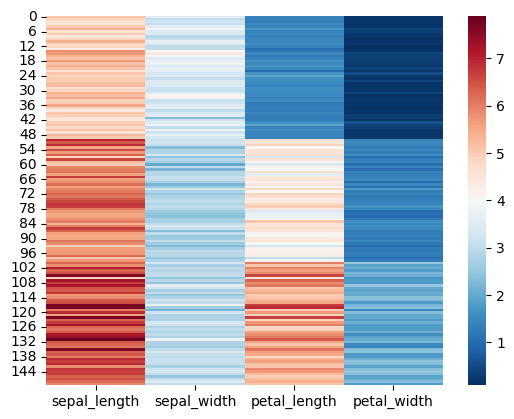

In [ ]:

fig, axs = plt.subplots()

h = sns.heatmap(X_df,cmap='RdBu_r')
# h.set_aspect("equal")

# Correlation of iris data

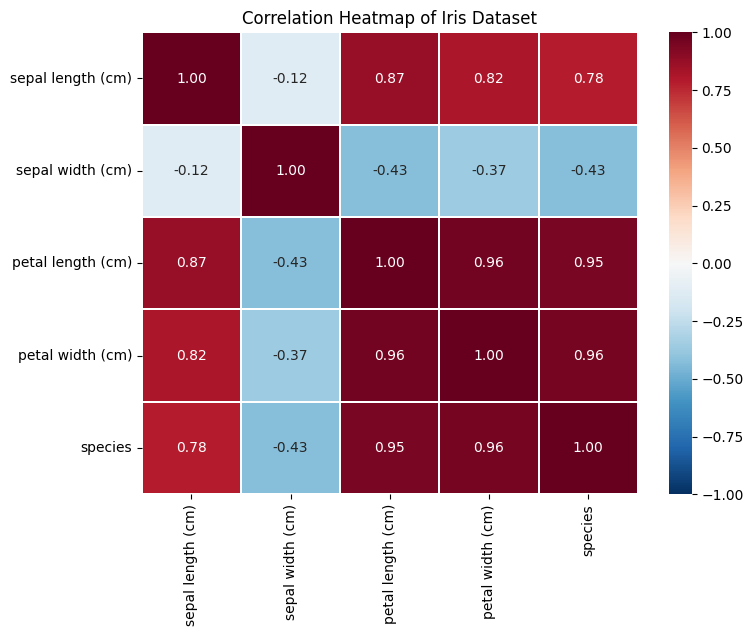

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['species'] = iris.target  # Add species as an integer

# Calculate correlation, excluding non-numeric columns
corr = iris_df.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='RdBu_r', linewidths=.05,
             vmax=1, vmin=-1,
             annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

In [ ]:
#%% seperate the data set into X and Y

# Sepal
X = iris_sns[['sepal_length', 'sepal_width']]

# Petal
Y = iris_sns[['petal_length', 'petal_width']]

In [ ]:
# Canonical Correlation Analysis. Construct S,T

Iris_CCA = CCA(n_components=2)
# only centra
Iris_CCA.fit(X, Y)
S, T = Iris_CCA.transform(X, Y)

# S.mean(axis = 0) # test only
# T.mean(axis = 0) # test only

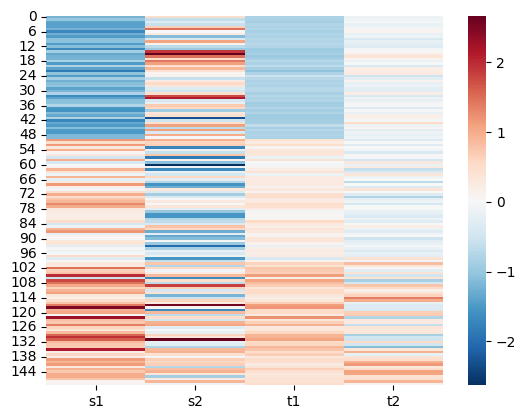

In [ ]:
# Visualize the results by Canonical Correlation Analysis

S_T_df = pd.DataFrame({"s1":S[:, 0],
                       "s2":S[:, 1],
                       "t1":T[:, 0],
                       "t2":T[:, 1]})

fig, axs = plt.subplots()

h = sns.heatmap(S_T_df,cmap='RdBu_r')
# h.set_aspect("equal")


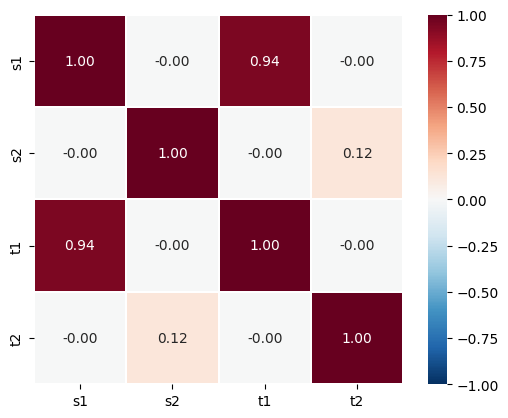

In [ ]:
#Construct Canonical Correlation Matrix
#Person’s correlation coefficient between variables
fig, axs = plt.subplots()

h = sns.heatmap(S_T_df.corr(),cmap='RdBu_r',
                linewidths=.05,

                vmax = 1, vmin = -1,
                annot=True,fmt='.2f')
h.set_aspect("equal")

# test only
# print(S_T_df.mean())

#%%

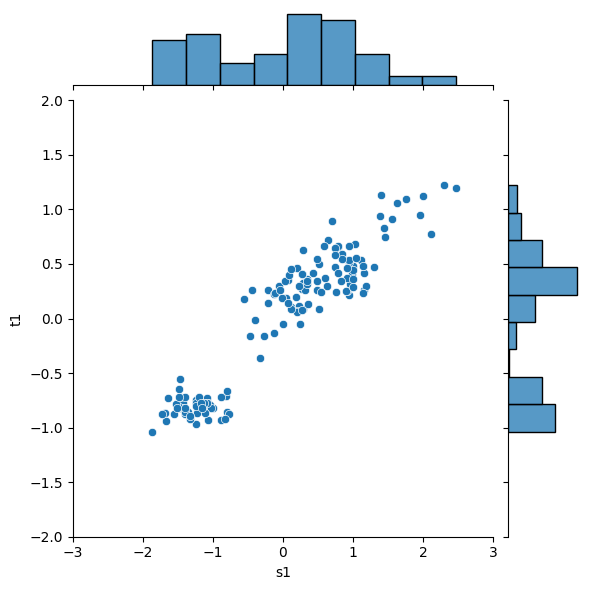

In [ ]:
# Scatter plot of t1 vs s1 with marginals

sns.jointplot(data=S_T_df, x="s1", y="t1",
              xlim = (-3,3), ylim = (-2,2))

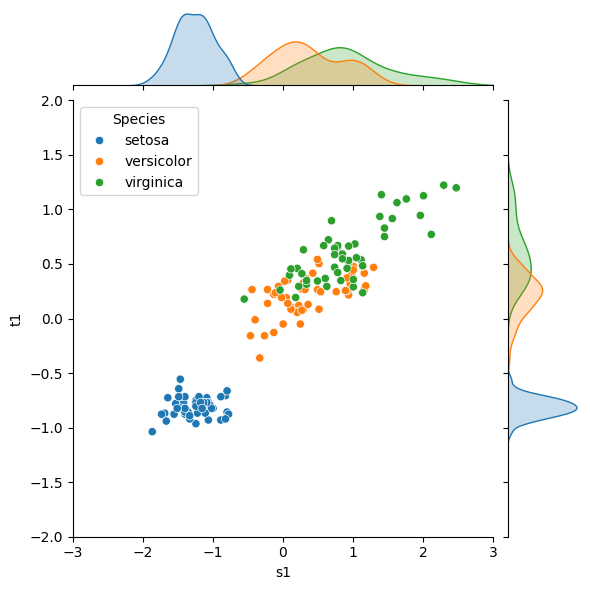

In [ ]:
# Scatter with marginals, with iris species

S_T_df_species = pd.DataFrame({"s1":S[:, 0],
                        "s2":S[:, 1],
                        "t1":T[:, 0],
                        "t2":T[:, 1],
                        "Species":iris_sns.species.tolist()})


sns.jointplot(data=S_T_df_species,
              x="s1", y="t1",
              hue = 'Species',
              xlim = (-3,3), ylim = (-2,2))

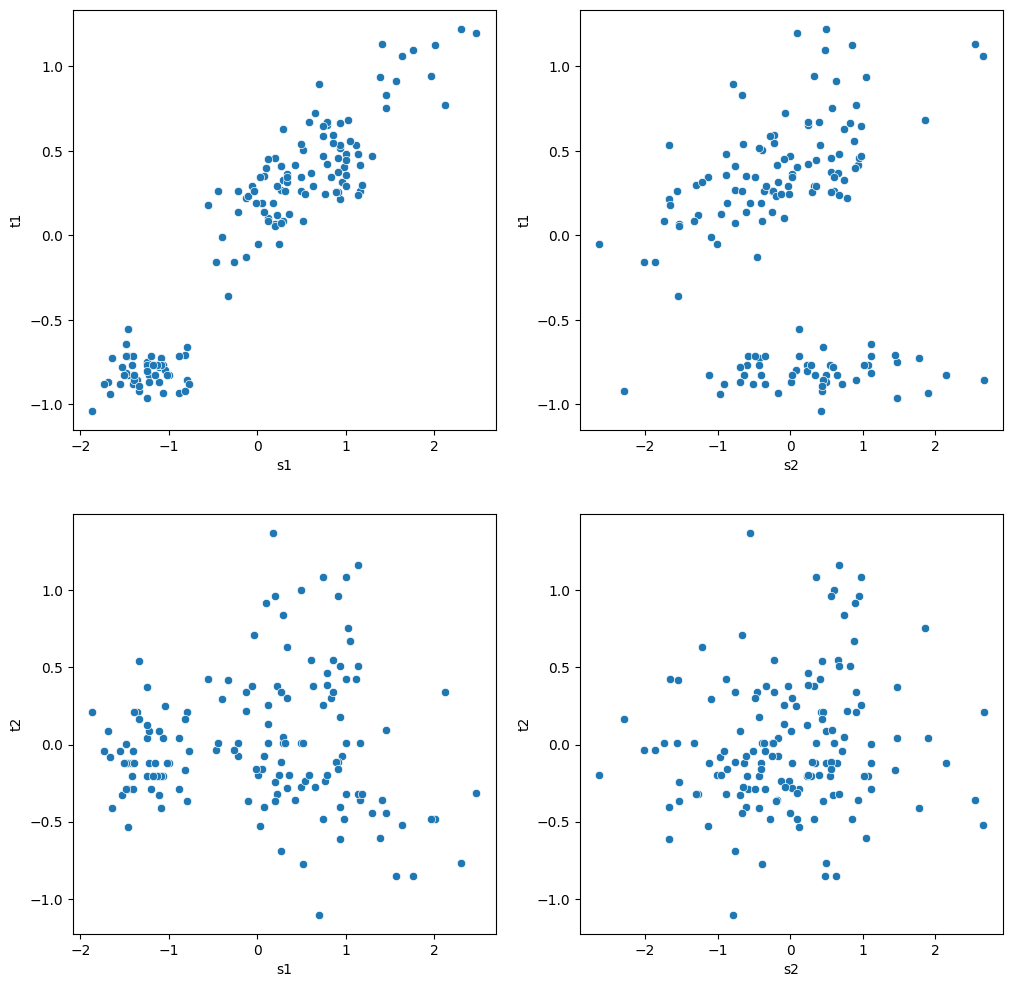

In [ ]:
# 2 * 2 scater plot

fig = plt.figure(figsize = (12,12))

plt.subplot(2, 2, 1)
sns.scatterplot(x="s1",y="t1", data=S_T_df_species)

plt.subplot(2, 2, 2)
sns.scatterplot(x="s2",y="t1", data=S_T_df_species)

plt.subplot(2, 2, 3)
sns.scatterplot(x="s1",y="t2", data=S_T_df_species)

plt.subplot(2, 2, 4)
sns.scatterplot(x="s2",y="t2", data=S_T_df_species)

plt.show()

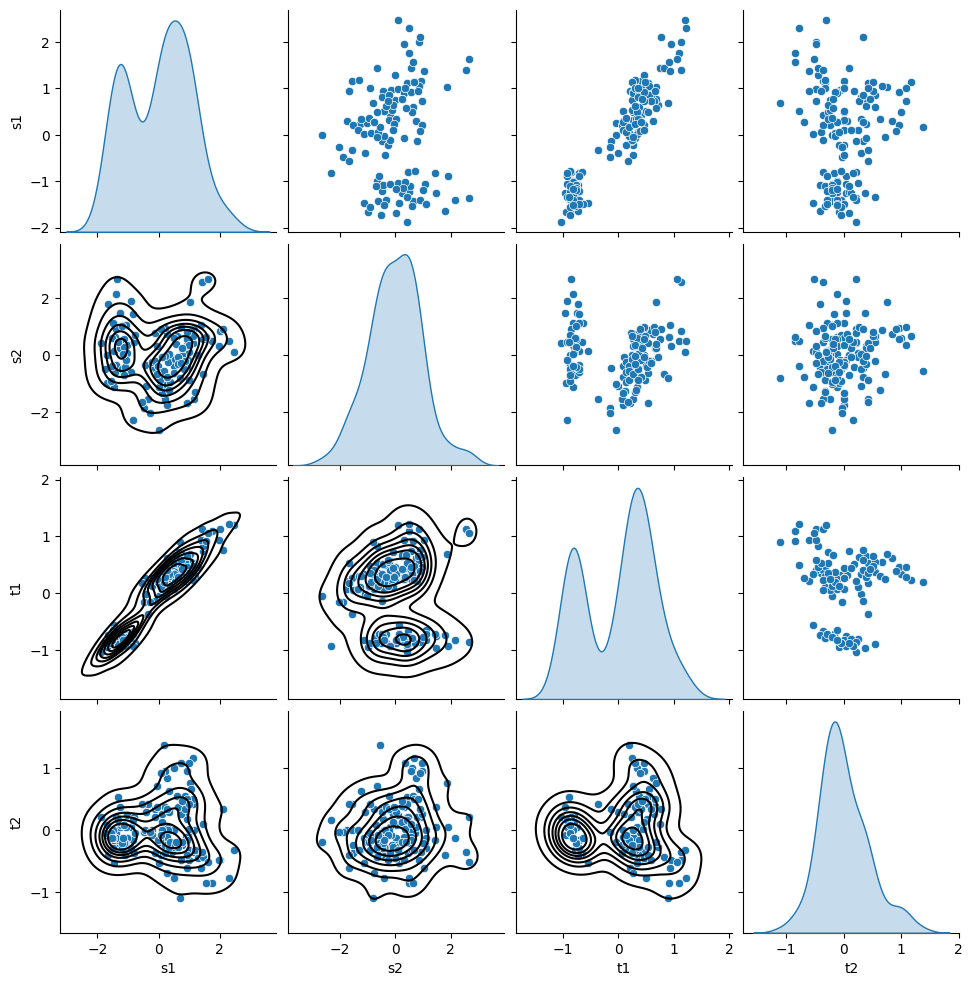

In [ ]:
# Pairwise plot

g = sns.pairplot(S_T_df_species, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=8, color="k")

In [ ]:
# Standardize original X Y
# Z scores

X_c = (X - X.mean())/X.std()
Y_c = (Y - Y.mean())/Y.std()

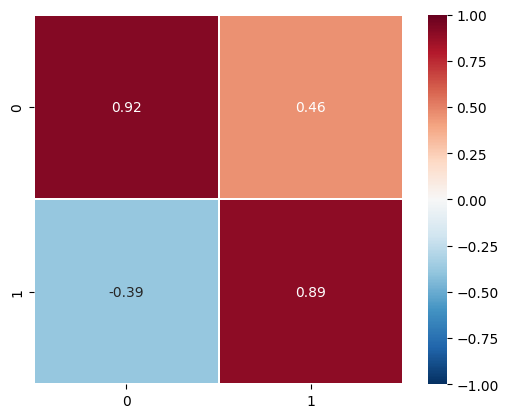

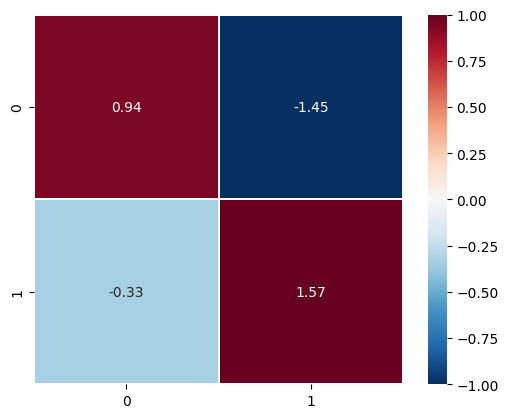

In [ ]:
# Two vectors to project X

U = Iris_CCA.x_rotations_
V = Iris_CCA.y_rotations_

# print(Iris_CCA.x_rotations_)
# print(Iris_CCA.x_rotations_[:,[0]])
# print(Iris_CCA.y_rotations_)
# print(Iris_CCA.y_rotations_[:,[0]])

u1 = U[:,[0]]
v1 = V[:,[0]]

fig, axs = plt.subplots()
h = sns.heatmap(U,cmap='RdBu_r',
                linewidths=.05,
                vmax = 1, vmin = -1,
                annot=True,fmt='.2f')
h.set_aspect("equal")

fig, axs = plt.subplots()
h = sns.heatmap(V,cmap='RdBu_r',
                linewidths=.05,
                vmax = 1, vmin = -1,
                annot=True,fmt='.2f')
h.set_aspect("equal")

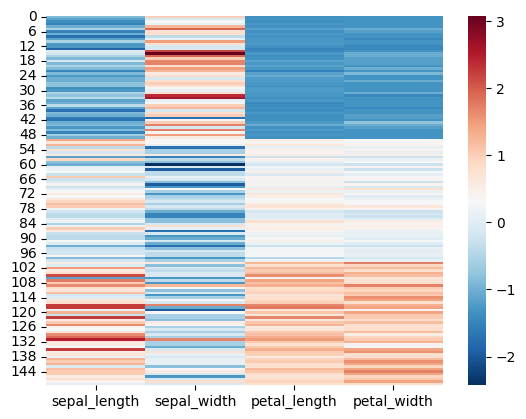

In [ ]:
# Standardize the data

Z_df = (X_df - X_df.mean())/X_df.std()

fig, axs = plt.subplots()

h = sns.heatmap(Z_df,cmap='RdBu_r')
# h.set_aspect("equal")

[[ 1.         -0.11756978  0.87175378  0.81794113  0.78256123]
 [-0.11756978  1.         -0.4284401  -0.36612593 -0.42665756]
 [ 0.87175378 -0.4284401   1.          0.96286543  0.9490347 ]
 [ 0.81794113 -0.36612593  0.96286543  1.          0.95654733]
 [ 0.78256123 -0.42665756  0.9490347   0.95654733  1.        ]]


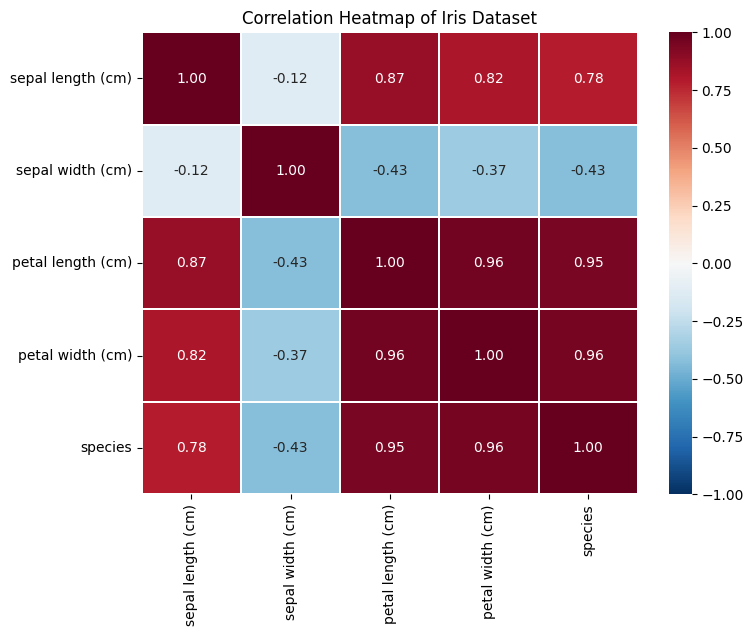

In [ ]:
#import numpy as np
#import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
#from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target  # Add species as an integer

# Calculate correlation matrix excluding non-numeric columns
corr = iris_df.corr()

# Convert correlation matrix to NumPy array
SIGMA = np.array(corr)

# Optionally, print or visualize the correlation matrix
print(SIGMA)

# If you want to visualize the heatmap
# Pearson’s correlation coefficient between variables

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='RdBu_r', linewidths=.05, vmax=1, vmin=-1, annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Iris Dataset')
plt.show()

In [ ]:
# Eigen-decomposition

Sigma_XX = SIGMA[0:2,0:2]
Sigma_XY = SIGMA[0:2,2:4]
Sigma_YX = SIGMA[2:4,0:2]
Sigma_YY = SIGMA[2:4,2:4]

Sigma_XX_inv = np.linalg.inv(Sigma_XX)
Sigma_YY_inv = np.linalg.inv(Sigma_YY)

P = Sigma_XX_inv @ Sigma_XY @ Sigma_YY_inv @ Sigma_YX

Q = Sigma_YY_inv @ Sigma_YX @ Sigma_XX_inv @ Sigma_XY

Text(0.5, 1.0, '$\\Sigma_{YX}$')

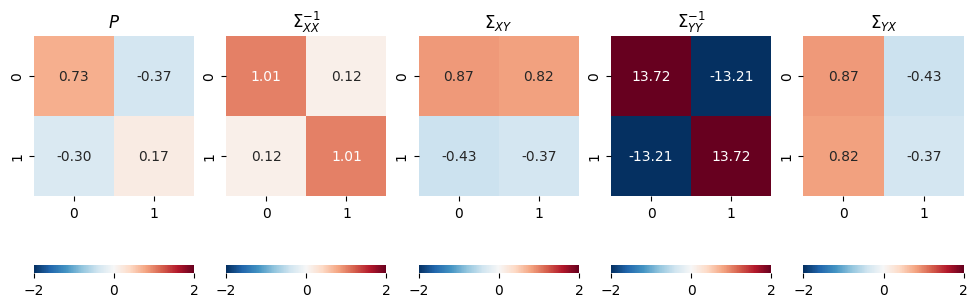

In [ ]:
# Heatmap of computing P and Q

fig, axs = plt.subplots(1, 5, figsize=(12, 6))
vmax = 2
vmin = -2

plt.sca(axs[0])
ax = sns.heatmap(P,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$P$')

plt.sca(axs[1])
ax = sns.heatmap(Sigma_XX_inv,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{XX}^{-1}$')

plt.sca(axs[2])
ax = sns.heatmap(Sigma_XY,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{XY}$')

plt.sca(axs[3])
ax = sns.heatmap(Sigma_YY_inv,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{YY}^{-1}$')

plt.sca(axs[4])
ax = sns.heatmap(Sigma_YX,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{YX}$')

Text(0.5, 1.0, '$\\Sigma_{XY}$')

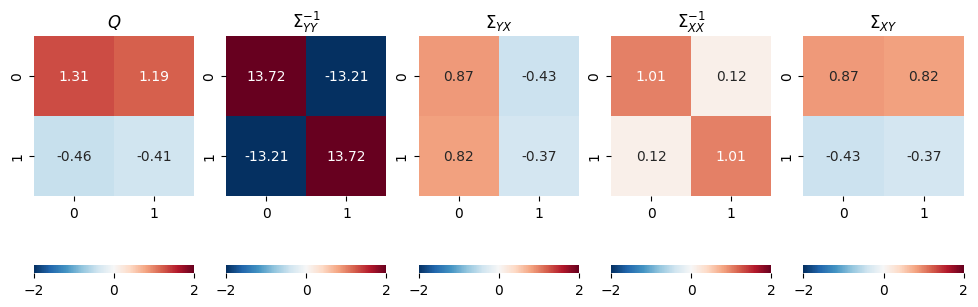

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(12, 6))
vmax = 2
vmin = -2

plt.sca(axs[0])
ax = sns.heatmap(Q,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$Q$')

plt.sca(axs[1])
ax = sns.heatmap(Sigma_YY_inv,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{YY}^{-1}$')

plt.sca(axs[2])
ax = sns.heatmap(Sigma_YX,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{YX}$')

plt.sca(axs[3])
ax = sns.heatmap(Sigma_XX_inv,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{XX}^{-1}$')

plt.sca(axs[4])
ax = sns.heatmap(Sigma_XY,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Sigma_{XY}$')

In [ ]:
# Heatmap of eigenvalue decomposition (EVD)

Lambda_U, U = np.linalg.eig(P)
Lambda_U = np.diag(Lambda_U)
U_inv = np.linalg.inv(U)

Lambda_V, V = np.linalg.eig(Q)
Lambda_V = np.diag(Lambda_V)
V_inv = np.linalg.inv(V)

Text(0.5, 1.0, '$U^{-1}$')

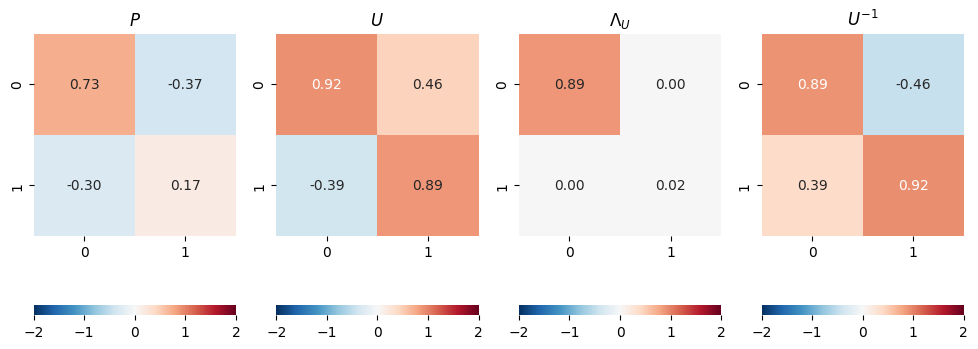

In [ ]:
# EVD of P
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
vmax = 2
vmin = -2

plt.sca(axs[0])
ax = sns.heatmap(P,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$P$')

plt.sca(axs[1])
ax = sns.heatmap(U,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$U$')

plt.sca(axs[2])
ax = sns.heatmap(Lambda_U,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Lambda_U$')

plt.sca(axs[3])
ax = sns.heatmap(U_inv,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$U^{-1}$')

Text(0.5, 1.0, '$V^{-1}$')

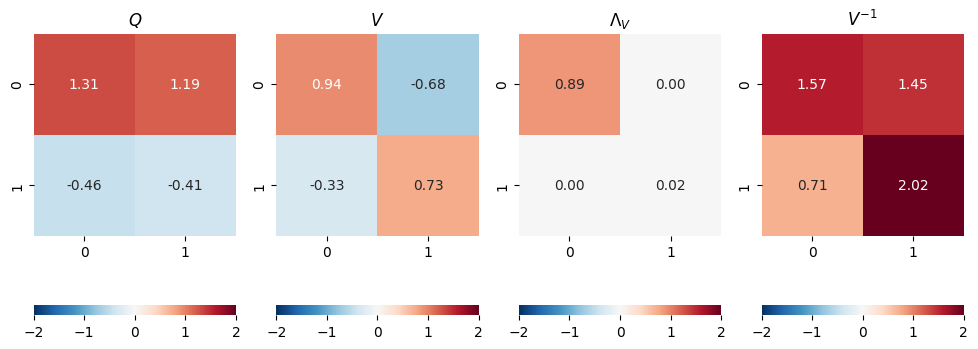

In [ ]:
# EVD of Q
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
vmax = 2
vmin = -2

plt.sca(axs[0])
ax = sns.heatmap(Q,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$Q$')

plt.sca(axs[1])
ax = sns.heatmap(V,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$V$')

plt.sca(axs[2])
ax = sns.heatmap(Lambda_V,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$\Lambda_V$')

plt.sca(axs[3])
ax = sns.heatmap(V_inv,cmap='RdBu_r',
                 annot=True,fmt='.2f',linecolor='black',
                 vmax = vmax, vmin = vmin,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title(r'$V^{-1}$')

References:

1. https://medium.com/@pozdrawiamzuzanna/canonical-correlation-analysis-simple-explanation-and-python-example-a5b8e97648d2

2.

